In [ ]:
!pip install pytesseract

Number input image...


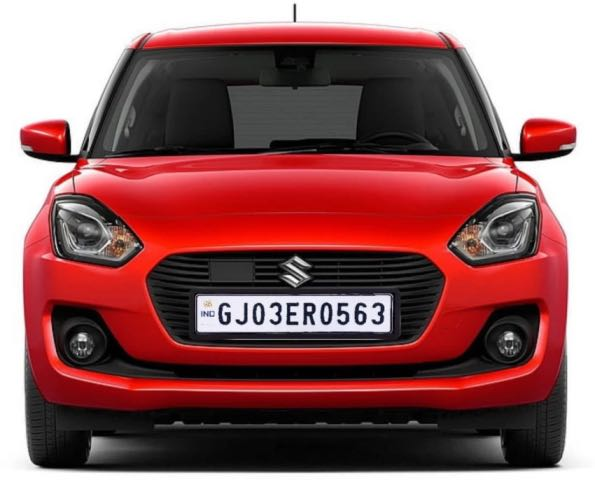

Number identified number plate...


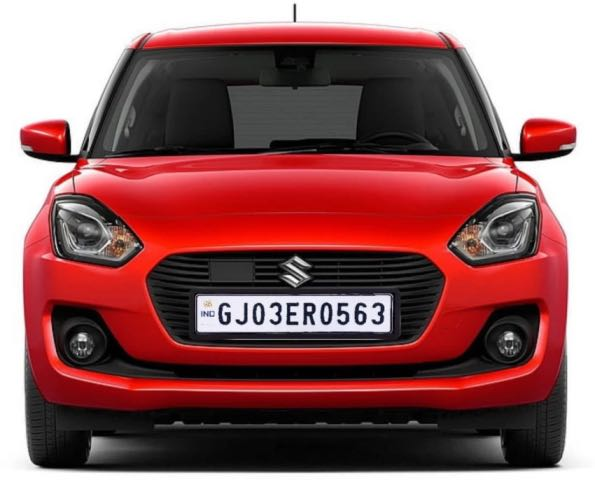

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
import numpy as np
import cv2
from PIL import Image
import pytesseract as tess
import pytesseract


def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(0) & 0xff == ord('q'):
        pass
    num_contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)

        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x, y, w, h = cv2.boundingRect(max_cnt)

        if not ratioCheck(max_cntArea, w, h):
            return plate, None

        final_img = thresh[y:y+h, x:x+w]
        return final_img, [x, y, w, h]
    else:
        return plate, None

def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

def isMaxWhite(plate):
    avg = np.mean(plate)
    if avg >= 115:
        return True
    else:
        return False

def ratio_and_rotation(rect):
    (x, y), (width, height), rect_angle = rect

    if width > height:
        angle = -rect_angle
    else:
        angle = 90 + rect_angle

    if angle > 15:
        return False

    if height == 0 or width == 0:
        return False

    area = height * width
    if not ratioCheck(area, width, height):
        return False
    else:
        return True

img = cv2.imread("/content/number2.jpg")
print("Number input image...",)
from google.colab.patches import cv2_imshow

# Replace cv2.imshow("input", img) with:
cv2_imshow(img)

if cv2.waitKey(0) & 0xff == ord('q'):
    pass

img2 = cv2.GaussianBlur(img, (3, 3), 0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

img2 = cv2.Sobel(img2, cv2.CV_8U, 1, 0, ksize=3)
_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img2.copy()
cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy = cv2.findContours(morph_img_threshold, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img2, num_contours, -1, (0, 255, 0), 1)

for i, cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)

    if ratio_and_rotation(min_rect):
        x, y, w, h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h, x:x+w]
        print("Number identified number plate...")
        cv2_imshow(img)  # Corrected indentation

        if cv2.waitKey(0) & 0xff == ord('q'):
            pass

        if isMaxWhite(plate_img):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg = 0
                x1, y1, w1, h1 = rect
                x, y, w, h = x+x1, y+y1, w1, h1
                plate_im = Image.fromarray(clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                print("Number Detected Plate Text:", text)

In [ ]:
pip install pytesseract


In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/content/result.png'


In [ ]:
import numpy as np
import cv2
from PIL import Image
import pytesseract as tess

def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    num_contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)

        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x,y,w,h = cv2.boundingRect(max_cnt)

        if not ratioCheck(max_cntArea,w,h):
            return plate,None

        final_img = thresh[y:y+h, x:x+w]
        return final_img,[x,y,w,h]
    else:
        return plate,None

def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
        return False

def ratio_and_rotation(rect):
    (x, y), (width, height), rect_angle = rect

    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle

    if angle>15:
        return False

    if height == 0 or width == 0:
        return False

    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

def classify(file_path):
    res_text=[0]
    res_img=[0]
    img = cv2.imread(file_path)
    img2 = cv2.GaussianBlur(img, (3,3), 0)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=3)
    _,img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
    morph_img_threshold = img2.copy()
    cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
    num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img2, num_contours, -1, (0,255,0), 1)

    for i,cnt in enumerate(num_contours):

        min_rect = cv2.minAreaRect(cnt)

        if ratio_and_rotation(min_rect):

            x,y,w,h = cv2.boundingRect(cnt)
            plate_img = img[y:y+h,x:x+w]
            res_img[0]=plate_img
            cv2.imwrite("result.png",plate_img)
            if(isMaxWhite(plate_img)):
                clean_plate, rect = clean2_plate(plate_img)

                if rect:
                    fg=0
                    x1,y1,w1,h1 = rect
                    x,y,w,h = x+x1,y+y1,w1,h1
                    plate_im = Image.fromarray(clean_plate)
                    text = tess.image_to_string(plate_im, lang='eng')
                    res_text[0]=text
                    if text:
                        break

    return res_text[0], res_img[0]

# Uploading the image file
from google.colab import files
uploaded = files.upload()

# Getting the file path of the uploaded image
file_path = next(iter(uploaded))

# Classify the uploaded image
text, plate_img = classify(file_path)

# Display the result
print("Detected Plate Text:", text)
print("Detected Plate Image:")
Image.fromarray(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))


Saving number2.jpg to number2 (1).jpg


PermissionError: [Errno 13] Permission denied: '/content/result.png'